In [22]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('bookseller.csv')

In [3]:
data.head()

,S.No,Date,Number of Books Sold
0,1,01-01-2020,90
1,2,02-01-2020,100
2,3,03-01-2020,100
3,4,04-01-2020,97
4,5,05-01-2020,93


In [4]:
data.tail()

,S.No,Date,Number of Books Sold
361,362,27-12-2020,91
362,363,28-12-2020,90
363,364,29-12-2020,92
364,365,30-12-2020,92
365,366,31-12-2020,99


In [5]:
data.describe()

,S.No,Number of Books Sold
count,366.000000,366.000000
mean,183.500000,94.961749
std,105.799338,3.178465
min,1.000000,90.000000
25%,92.250000,92.000000
50%,183.500000,95.000000
75%,274.750000,98.000000
max,366.000000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S.No                  366 non-null    int64 
 1   Date                  366 non-null    object
 2   Number of Books Sold  366 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ KB


In [7]:
data.isnull().sum()

S.No                    0
Date                    0
Number of Books Sold    0
dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [42]:
# Calculate the probability of selling >= 96 books
probability_ge_96 = (data['Number of Books Sold'] >= 96).mean()
print(f"Probability of selling >= 96 books: {probability_ge_96:.4f}")


Probability of selling >= 96 books: 0.4508


In [9]:
total_books_sold = data['Number of Books Sold'].sum()
print(f"Total Books Sold: {total_books_sold}")

Total Books Sold: 34756


In [10]:
average_daily_sales = data['Number of Books Sold'].mean()
print(f"Average Daily Sales: {average_daily_sales:.2f}")

Average Daily Sales: 94.96


In [12]:
max_sales = data['Number of Books Sold'].max()
max_sales_date = data.loc[data['Number of Books Sold'] == max_sales, 'Date'].iloc[0]
print(f"Maximum Sales: {max_sales} on {max_sales_date.strftime('%d-%m-%Y')}")

Maximum Sales: 100 on 02-01-2020


In [13]:
min_sales = data['Number of Books Sold'].min()
min_sales_date = data.loc[data['Number of Books Sold'] == min_sales, 'Date'].iloc[0]
print(f"Minimum Sales: {min_sales} on {min_sales_date.strftime('%d-%m-%Y')}")

Minimum Sales: 90 on 01-01-2020


In [15]:
data.head()

,S.No,Date,Number of Books Sold
0,1,2020-01-01,90
1,2,2020-01-02,100
2,3,2020-01-03,100
3,4,2020-01-04,97
4,5,2020-01-05,93


In [16]:
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month
data['Day of Week'] = data['Date'].dt.day_name()

In [17]:
weekly_sales = data.groupby('Week')['Number of Books Sold'].mean().reset_index()
print("Weekly Sales:")
print(weekly_sales)

Weekly Sales:
    Week  Number of Books Sold
0      1             96.000000
1      2             96.000000
2      3             94.571429
3      4             97.000000
4      5             94.428571
5      6             97.285714
6      7             93.857143
7      8             94.428571
8      9             95.142857
9     10             93.857143
10    11             94.000000
11    12             94.428571
12    13             93.285714
13    14             95.428571
14    15             96.000000
15    16             95.428571
16    17             94.000000
17    18             94.571429
18    19             94.571429
19    20             95.857143
20    21             94.571429
21    22             95.571429
22    23             95.000000
23    24             96.000000
24    25             94.142857
25    26             95.428571
26    27             94.428571
27    28             96.000000
28    29             95.714286
29    30             96.285714
30    31             95.1

In [18]:
monthly_sales = data.groupby('Month')['Number of Books Sold'].mean().reset_index()
print("\nMonthly Sales:")
print(monthly_sales)


Monthly Sales:
    Month  Number of Books Sold
0       1             95.290323
1       2             95.413793
2       3             94.193548
3       4             95.133333
4       5             95.000000
5       6             95.000000
6       7             95.741935
7       8             95.419355
8       9             95.500000
9      10             94.193548
10     11             94.533333
11     12             94.161290


In [19]:
day_of_week_sales = data.groupby('Day of Week')['Number of Books Sold'].mean().reset_index()
print("\nSales by Day of the Week:")
print(day_of_week_sales)


Sales by Day of the Week:
  Day of Week  Number of Books Sold
0      Friday             95.153846
1      Monday             94.711538
2    Saturday             95.096154
3      Sunday             95.403846
4    Thursday             95.056604
5     Tuesday             95.384615
6   Wednesday             93.943396


In [27]:
!pip install matplotlib


# Montly Sales

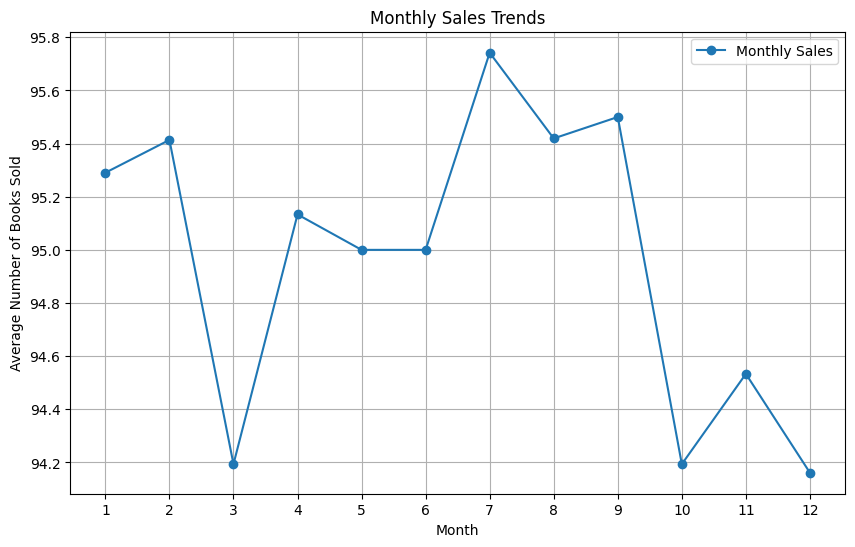

In [28]:
import matplotlib.pyplot as plt

# Plot Monthly Sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Number of Books Sold'], marker='o', label='Monthly Sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Average Number of Books Sold')
plt.xticks(range(1, 13))
plt.grid()
plt.legend()
plt.show()

# Day of the week sales

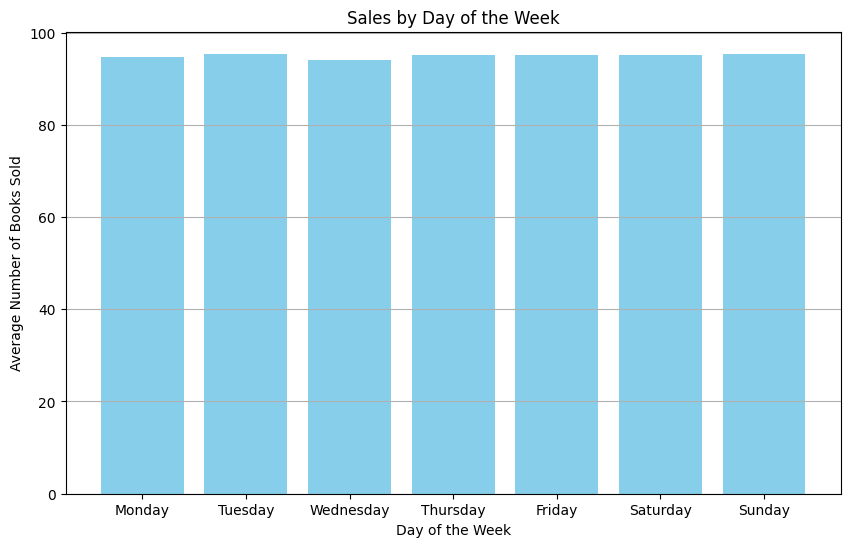

In [29]:
plt.figure(figsize=(10, 6))
day_of_week_sales_sorted = day_of_week_sales.set_index('Day of Week').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
plt.bar(day_of_week_sales_sorted['Day of Week'], day_of_week_sales_sorted['Number of Books Sold'], color='skyblue')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Books Sold')
plt.grid(axis='y')
plt.show()

In [31]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/294.9 kB 1.9 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/294.9 kB 1.7 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/294.9 kB 1.7 MB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 853.3 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/294.9 kB 857.5 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/294.9 kB 857.5 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/294.9 kB 857.5 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 686.8 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 681.0 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 674.6 kB/s eta 0:00:00


# Daily Sales over Time

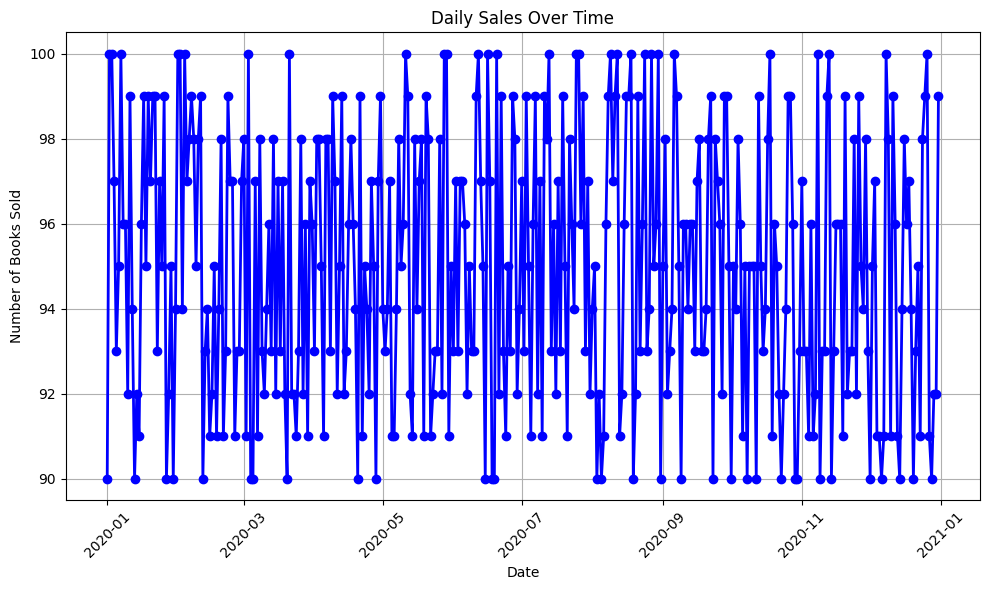

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Number of Books Sold'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Books Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Frequency of the sales

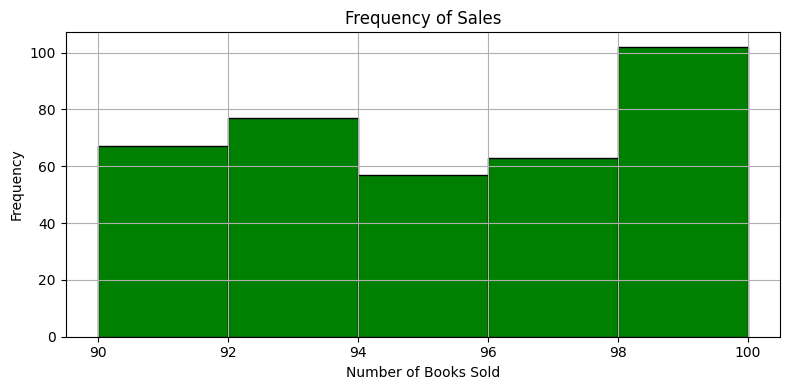

In [34]:
plt.figure(figsize=(8, 4))
plt.hist(data['Number of Books Sold'], bins=5, color='green', edgecolor='black')
plt.title('Frequency of Sales')
plt.xlabel('Number of Books Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
import seaborn as sns

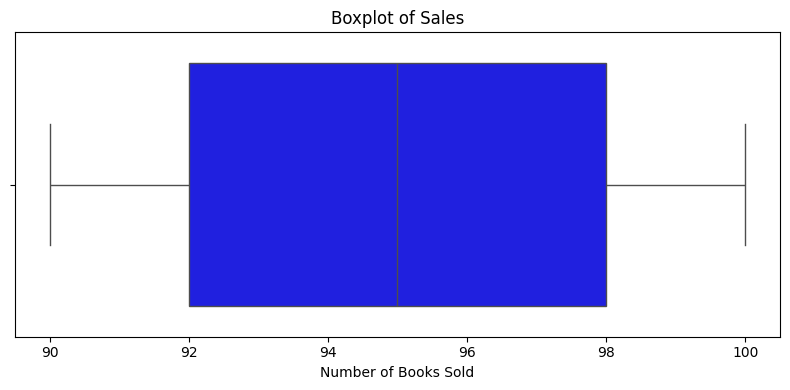

In [41]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Number of Books Sold'], color='blue')
plt.title('Boxplot of Sales')
plt.xlabel('Number of Books Sold')
plt.tight_layout()
plt.show()


In [43]:
# Calculate the probability of selling <= 92 books
probability_le_92 = (data['Number of Books Sold'] <= 92).mean()
print(f"Probability of selling <= 92 books: {probability_le_92:.4f}")


Probability of selling <= 92 books: 0.2760


In [44]:
# Calculate the probability of selling >= 96 books
probability_ge_96 = (data['Number of Books Sold'] >= 96).mean()
print(f"Probability of selling >= 96 books: {probability_ge_96:.4f}")


Probability of selling >= 96 books: 0.4508
